In [99]:
import numpy as np
import pandas as pd

np.random.seed(23)

mu_vec1 = np.array([0, 0, 0])
cov_mat1 = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20)

df = pd.DataFrame(class1_sample, columns=['feature1', 'feature2', 'feature3'])
df['target'] = 1

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20)

df1 = pd.DataFrame(class2_sample, columns= ['feature1', 'feature2', 'feature3'])

df1['target'] = 0

df = pd.concat([df, df1], ignore_index=True)

df = df.sample(40)

In [101]:
df.head()

,feature1,feature2,feature3,target
2,-0.367548,-1.137460,-1.322148,1
34,0.177061,-0.598109,1.226512,0
14,0.420623,0.411620,-0.071324,1
11,1.968435,-0.547788,-0.679418,1
12,-2.506230,0.146960,0.606195,1


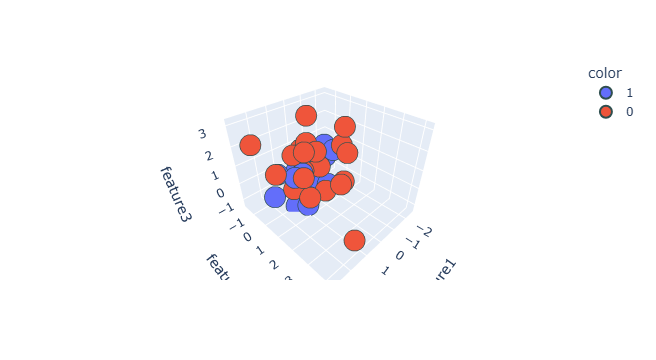

In [103]:
import plotly.express as px
#y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df, x=df['feature1'], y=df['feature2'], z=df['feature3'],
              color=df['target'].astype('str'))
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

fig.show()

## Steps to solve the problem converting 3D to 2D

# step_1   Apply standard scaling

In [107]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df.iloc[:,0:3] = scaler.fit_transform(df.iloc[:,0:3])

# Step 2 - Find Covariance Matrix

In [110]:
covariance_matrix = np.cov([df.iloc[:,0], df.iloc[:,1], df.iloc[:,2]])
print('Covarince Matrix:\n', covariance_matrix)

Covarince Matrix:
 [[1.02564103 0.20478114 0.080118  ]
 [0.20478114 1.02564103 0.19838882]
 [0.080118   0.19838882 1.02564103]]


# Step 3 - Finding EV and EVs

In [113]:
eigen_value, eigen_vector = np.linalg.eig(covariance_matrix)

In [115]:
eigen_value

array([1.3536065 , 0.94557084, 0.77774573])

In [117]:
eigen_vector

array([[-0.53875915, -0.69363291,  0.47813384],
       [-0.65608325, -0.01057596, -0.75461442],
       [-0.52848211,  0.72025103,  0.44938304]])

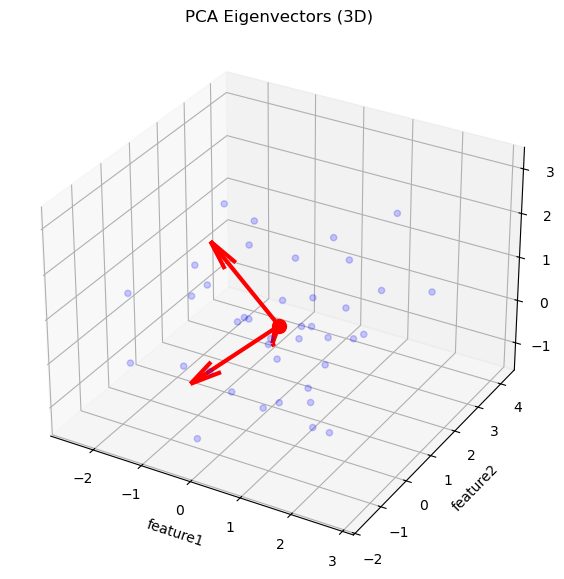

In [119]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# ----------------------------
# 1. Create sample dataset
# ----------------------------
np.random.seed(23)

mu_vec1 = np.array([0, 0, 0])
cov_mat1 = np.eye(3)
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20)

df = pd.DataFrame(class1_sample, columns=['feature1', 'feature2', 'feature3'])
df['target'] = 1

mu_vec2 = np.array([1, 1, 1])
cov_mat2 = np.eye(3)
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20)

df1 = pd.DataFrame(class2_sample, columns=['feature1', 'feature2', 'feature3'])
df1['target'] = 0

df = pd.concat([df, df1], ignore_index=True)
df = df.sample(frac=1, random_state=23)

# ----------------------------
# 2. PCA computation
# ----------------------------
X = df[['feature1', 'feature2', 'feature3']].values
X_meaned = X - np.mean(X, axis=0)
cov_mat = np.cov(X_meaned, rowvar=False)
eigen_values, eigen_vectors = np.linalg.eig(cov_mat)

# ----------------------------
# 3. Plot data + eigenvectors
# ----------------------------
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot data points
ax.scatter(
    df['feature1'],
    df['feature2'],
    df['feature3'],
    color='blue',
    alpha=0.2
)

# Mean point
mean_x, mean_y, mean_z = X.mean(axis=0)
ax.scatter(mean_x, mean_y, mean_z, color='red', s=100)

# Plot eigenvectors using quiver (STABLE)
for v in eigen_vectors.T:
    ax.quiver(
        mean_x, mean_y, mean_z,
        v[0], v[1], v[2],
        length=2,
        color='red',
        linewidth=3
    )

ax.set_xlabel('feature1')
ax.set_ylabel('feature2')
ax.set_zlabel('feature3')
plt.title('PCA Eigenvectors (3D)')
plt.show()


In [121]:
pc = eigen_vectors[0:2]
pc

array([[-0.61002583, -0.69239396,  0.3853039 ],
       [-0.53982115,  0.00718615, -0.84174906]])

In [123]:
transformed_df = np.dot(df.iloc[:,0:3],pc.T)
# 40,3 - 3,2
new_df = pd.DataFrame(transformed_df,columns=['PC1','PC2'])
new_df['target'] = df['target'].values
new_df.head()

,PC1,PC2,target
0,1.571096,-0.353855,1
1,-0.714905,-2.494424,0
2,0.459927,-0.022297,1
3,-3.953371,-0.807297,0
4,-0.475664,-3.746533,0


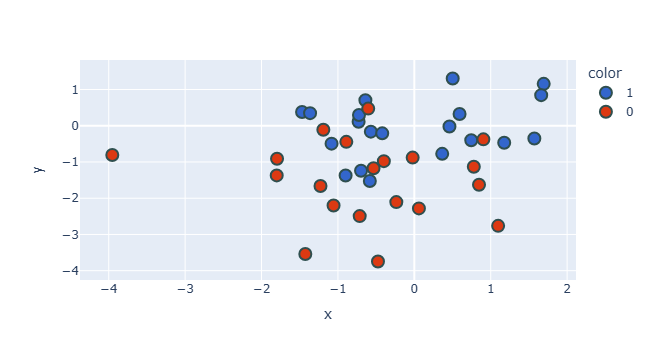

In [125]:
new_df['target'] = new_df['target'].astype('str')
fig = px.scatter(x=new_df['PC1'],
                 y=new_df['PC2'],
                 color=new_df['target'],
                 color_discrete_sequence=px.colors.qualitative.G10
                )

fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()
     
